# Relax Challenge

### Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime


1] A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one
of 5 values:
   * PERSONAL_PROJECTS: invited to join another user's personal workspace
   * GUEST_INVITE: invited to an organization as a guest (limited permissions)
   * ORG_INVITE: invited to an organization (as a full member)
   * SIGNUP: signed up via the website
   * SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
* enabled_for_marketing_drip: whether they are on the regular
marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).


In [499]:
engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=['creation_time'])

### Explore users dataset

In [500]:
# Explore user data set

users.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [501]:
users.describe()

object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03              12000.000000   
mean    6000.50000                1.379279e+09                  0.249500   
std     3464.24595                1.953116e+07                  0.432742   
min        1.00000                1.338452e+09                  0.000000   
25%     3000.75000                1.363195e+09                  0.000000   
50%     6000.50000                1.382888e+09                  0.000000   
75%     9000.25000                1.398443e+09                  0.000000   
max    12000.00000                1.402067e+09                  1.000000   

       enabled_for_marketing_drip        org_id  invited_by_user_id  
count                12000.000000  12000.000000         6417.000000  
mean                     0.149333    141.884583         5962.957145  
std                      0.356432    124.056723         3383.761968  
min                      0.000000      0.000000            3.000000  
25%                      0.000000     29.000000         3058.000000  
50%                      0.000000    108.000000         5954.000000  
75%                      0.000000    238.250000         8817.000000  
max                      1.000000    416.000000        11999.000000

In [502]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [503]:
# Convert Unix timestamp

users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [504]:
users.head()

object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

In [505]:
users.isnull().sum().T

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [506]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)
users['invited_by_user_id'] = users['invited_by_user_id'].astype(int)

In [507]:
users.isnull().sum().T

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
dtype: int64

In [508]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 937.6+ KB


In [509]:
users.loc[users.last_session_creation_time.isnull(), :]

object_id       creation_time               name  \
7              8 2013-07-31 05:34:02  Hamilton Danielle   
8              9 2013-11-05 04:04:24         Amsel Paul   
11            12 2014-04-17 23:48:38    Mathiesen Lærke   
14            15 2013-07-16 21:33:54        Theiss Ralf   
15            16 2013-02-11 10:09:50         Engel René   
...          ...                 ...                ...   
11975      11976 2013-12-25 22:01:41          Kohl Leah   
11977      11978 2014-04-23 16:28:06       Castro Pedro   
11984      11985 2013-07-08 17:23:26   Jespersen Marcus   
11992      11993 2013-03-28 23:24:21    Townsend Isabel   
11993      11994 2012-06-05 04:46:16     Grimstone Joel   

                            email    creation_source  \
7      DanielleHamilton@yahoo.com  PERSONAL_PROJECTS   
8           PaulAmsel@hotmail.com  PERSONAL_PROJECTS   
11      LaerkeLMathiesen@cuvox.de         ORG_INVITE   
14         RalfTheiss@hotmail.com  PERSONAL_PROJECTS   
15          ReneEngel@hotmail.com  PERSONAL_PROJECTS   
...                           ...                ...   
11975        LeahKohl@hotmail.com  PERSONAL_PROJECTS   
11977  PedroCunhaCastro@gustr.com  PERSONAL_PROJECTS   
11984   MarcusTJespersen@cuvox.de  PERSONAL_PROJECTS   
11992     IsabelTownsend@cuvox.de  PERSONAL_PROJECTS   
11993          conxzghp@eaouk.com       GUEST_INVITE   

      last_session_creation_time  opted_in_to_mailing_list  \
7                            NaT                         1   
8                            NaT                         0   
11                           NaT                         0   
14                           NaT                         0   
15                           NaT                         0   
...                          ...                       ...   
11975                        NaT                         0   
11977                        NaT                         1   
11984                        NaT                         0   
11992                        NaT                         0   
11993                        NaT                         0   

       enabled_for_marketing_drip  org_id  invited_by_user_id  
7                               1      74                   0  
8                               0     302                   0  
11                              0     130                9270  
14                              0     175                   0  
15                              0     211                   0  
...                           ...     ...                 ...  
11975                           0     248                   0  
11977                           0      29                   0  
11984                           0      74                   0  
11992                           0     281                   0  
11993                           0      84                5450  

[3177 rows x 10 columns]

We need to look into filling the NaT values in the last_session_creation_time column. I think the NaT value represents users having never signed on after creating their account which means this date should be equal to the creation time date. I'd like to verify this with the user engagement data to confirm that these individuals never logged in. Before we look into this, lets create a column to represent whether a user has referred another user.

In [510]:
# find the number of users who have referred someone.

len(users.invited_by_user_id.unique())

2565

In [511]:
referrer_list = users.invited_by_user_id.unique()

In [512]:
# create function to flag users that have recommended another user

def referral_flag(row):
    if row['object_id'] in referrer_list :
        return 1
    else: return 0

In [513]:
users['referred_user'] = users.apply(lambda row : referral_flag(row), axis=1)

In [514]:
# Create a column that indicates whether the user was referred by another user

def referred_by_flag(row):
    if row['invited_by_user_id'] == 0:
        return 0
    else: return 1

In [515]:
users['referred_by_user'] = users.apply(lambda row: referred_by_flag(row), axis=1)

In [516]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  referred_user               12000 non-null  int64         
 11  referred_by_user            12000 non-null  int64     

We now have binary columns that indicate whether a user referred someone or was referred by someone. These could be important variables for identifying adoption.

### Explore engagement dataset

In [517]:
engagement.head()

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [518]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [519]:
engagement.describe()

user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0

We need to group this data by user id.

In [520]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

In [521]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


We have data that starts in 2012-05-31 to 2014-06-06

In [522]:
print('Number of users: {}'.format(len(engagement.user_id.unique())))

Number of users: 8823


In [523]:
# create date column without time in the engagement dataframe

engagement['date'] = engagement['time_stamp'].dt.date
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.3+ MB


In [524]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.3+ MB


In [525]:
# create boolean mask to filter out user_id's with less than 3 login dates

boolean_mask = pd.Series.to_dict(engagement.groupby('user_id').count().date >=3)
boolean_mask

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 10: True,
 11: False,
 13: False,
 14: False,
 17: False,
 19: False,
 20: True,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 33: True,
 36: False,
 37: False,
 41: False,
 42: True,
 43: True,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: True,
 51: False,
 53: True,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: True,
 60: True,
 61: False,
 63: True,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: True,
 72: False,
 73: False,
 74: True,
 75: False,
 76: False,
 77: True,
 78: False,
 80: True,
 81: True,
 82: True,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: False,
 89: False,
 90: False,
 91: False,
 92: False,
 94: False,
 95: True,
 96: False,
 97: False,
 98: False,
 99: False,
 100: False,
 101: False,
 103: False,
 105: False,
 106: False,
 

In [526]:
engagement_df = engagement.copy()
engagement_df['keep_user'] = engagement_df.user_id.map(boolean_mask)
engagement_df.head(20)

time_stamp  user_id  visited        date  keep_user
0  2014-04-22 03:53:30        1        1  2014-04-22      False
1  2013-11-15 03:45:04        2        1  2013-11-15       True
2  2013-11-29 03:45:04        2        1  2013-11-29       True
3  2013-12-09 03:45:04        2        1  2013-12-09       True
4  2013-12-25 03:45:04        2        1  2013-12-25       True
5  2013-12-31 03:45:04        2        1  2013-12-31       True
6  2014-01-08 03:45:04        2        1  2014-01-08       True
7  2014-02-03 03:45:04        2        1  2014-02-03       True
8  2014-02-08 03:45:04        2        1  2014-02-08       True
9  2014-02-09 03:45:04        2        1  2014-02-09       True
10 2014-02-13 03:45:04        2        1  2014-02-13       True
11 2014-02-16 03:45:04        2        1  2014-02-16       True
12 2014-03-09 03:45:04        2        1  2014-03-09       True
13 2014-03-13 03:45:04        2        1  2014-03-13       True
14 2014-03-31 03:45:04        2        1  2014-03-31       True
15 2013-03-19 23:14:52        3        1  2013-03-19      False
16 2013-05-22 08:09:28        4        1  2013-05-22      False
17 2013-01-22 10:14:20        5        1  2013-01-22      False
18 2013-12-19 03:37:06        6        1  2013-12-19      False
19 2012-12-20 13:24:32        7        1  2012-12-20      False

In [527]:
engagement_df = engagement_df[engagement_df['keep_user'] == True]

In [528]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  201002 non-null  datetime64[ns]
 1   user_id     201002 non-null  int64         
 2   visited     201002 non-null  int64         
 3   date        201002 non-null  object        
 4   keep_user   201002 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ MB


In [529]:
print('the number of users with at least 3 logins is: {}'.format(len(engagement_df.groupby('user_id')['keep_user'].count())))

the number of users with at least 3 logins is: 2248


In [530]:
user_list = engagement_df.user_id.unique()
user_list

array([    2,    10,    20, ..., 11981, 11988, 11991])

Create a function to check if logins from 3 days is within a 7 day period

In [531]:
def adopted_user_flag(x):
    
    '''This function takes in a list of timestamps and returns wehther or not there are at 
        least 3 logins in a week
    
    inputs
    x is a list of dates
    
    outputs
    Boolean True or False
    
    '''
    
    length = len(x)
    idx = 1
    
    # only look until the second last item in the list
    while idx < (length -2):
        
        # check timestamp that is 2 indexes away from current and see if it's greater than 7
        if (x[idx + 2] - x[idx]).days > 7:
            idx += 1
            continue
            
        else:
            # return true if the days span less than 7
            return True
    
    # if we end the loop and don't obtain a true value, we return false
    return False
            
        
    

create a function that takes in a list of users and a df grouped by users to create a dictionary that flags each user id as one that either satisfies the adopted criteria or not.

In [532]:
def check_for_adoption(group_df, users):
    
    '''This function has two inputs. group_df and users and retruns a dictionary with user id and boolean to
    flag whether the user has met the adoption criteria
    
    Inputs
    
    group_df = dataframe grouped by user_ids and column of date
    
    users = list of unique user id's
    
    Outputs
    boolean_dict = Dictionary with user_ids as keys and boolean as the value
    '''
    # create empty boolean dictionary
    boolean_dict = {}
    
    dates = [list(group_df.get_group(x) for x in users)]
    
    #Iterate through each list of dates for each user
    
    for position, user in enumerate(users):
        boolean_dict[user] = adopted_user_flag(dates[position])
    
    return boolean_dict
    

In [533]:
# create group_df 

grouped = engagement_df.groupby('user_id')['time_stamp']


In [537]:
eng = engagement_df.copy()

In [538]:
# convert date column to datetime object

eng['date_time'] = pd.to_datetime(eng['date'])

In [539]:
group_test = eng.groupby('user_id')['date_time']

In [540]:
dates = [list(group_test.get_group(x)) for x in user_list]

In [541]:
dates

[[Timestamp('2013-11-15 00:00:00'),
  Timestamp('2013-11-29 00:00:00'),
  Timestamp('2013-12-09 00:00:00'),
  Timestamp('2013-12-25 00:00:00'),
  Timestamp('2013-12-31 00:00:00'),
  Timestamp('2014-01-08 00:00:00'),
  Timestamp('2014-02-03 00:00:00'),
  Timestamp('2014-02-08 00:00:00'),
  Timestamp('2014-02-09 00:00:00'),
  Timestamp('2014-02-13 00:00:00'),
  Timestamp('2014-02-16 00:00:00'),
  Timestamp('2014-03-09 00:00:00'),
  Timestamp('2014-03-13 00:00:00'),
  Timestamp('2014-03-31 00:00:00')],
 [Timestamp('2013-01-16 00:00:00'),
  Timestamp('2013-01-22 00:00:00'),
  Timestamp('2013-01-30 00:00:00'),
  Timestamp('2013-02-04 00:00:00'),
  Timestamp('2013-02-06 00:00:00'),
  Timestamp('2013-02-14 00:00:00'),
  Timestamp('2013-02-17 00:00:00'),
  Timestamp('2013-02-19 00:00:00'),
  Timestamp('2013-02-26 00:00:00'),
  Timestamp('2013-03-01 00:00:00'),
  Timestamp('2013-03-02 00:00:00'),
  Timestamp('2013-03-05 00:00:00'),
  Timestamp('2013-03-09 00:00:00'),
  Timestamp('2013-03-15 00:

In [542]:
bool_dict = {}

for position, user in enumerate(user_list):
        bool_dict[user] = adopted_user_flag(dates[position])
    
bool_dict

{2: True,
 10: True,
 20: False,
 33: True,
 42: True,
 43: True,
 50: True,
 53: True,
 59: False,
 60: True,
 63: True,
 69: True,
 74: True,
 77: False,
 80: True,
 81: True,
 82: True,
 87: True,
 95: False,
 126: False,
 133: True,
 135: True,
 136: False,
 141: True,
 142: False,
 146: True,
 153: True,
 160: True,
 165: True,
 168: True,
 171: False,
 172: True,
 174: True,
 185: True,
 188: True,
 197: True,
 200: True,
 202: True,
 203: True,
 209: True,
 214: True,
 221: False,
 230: True,
 241: False,
 245: True,
 247: True,
 251: False,
 263: True,
 265: True,
 275: True,
 277: False,
 280: True,
 283: True,
 297: True,
 298: True,
 305: True,
 310: True,
 311: True,
 321: True,
 322: True,
 330: False,
 337: False,
 341: True,
 345: True,
 347: True,
 351: True,
 362: True,
 363: True,
 367: False,
 370: True,
 375: False,
 382: False,
 383: True,
 390: False,
 397: True,
 398: False,
 401: True,
 417: False,
 418: True,
 430: True,
 445: True,
 450: True,
 455: False,
 46

In [543]:
len(bool_dict)

2248

Refilter with new boolean to identify adoption users

In [544]:
eng = eng.drop('keep_user', axis=1)

In [ ]:
eng.info()

In [545]:
eng['keep_user'] = eng.user_id.map(bool_dict)

In [546]:
eng = eng[eng['keep_user'] == True]

len(eng)

198067

We now have identified 1607 unique id's that satisfy the adoption criteria

In [547]:
len(eng.user_id.unique())
adopted_users = eng.user_id.unique()

Lets combine this data with the user dataframe

In [548]:
users

object_id       creation_time               name  \
0              1 2014-04-22 03:53:30     Clausen August   
1              2 2013-11-15 03:45:04      Poole Matthew   
2              3 2013-03-19 23:14:52  Bottrill Mitchell   
3              4 2013-05-21 08:09:28    Clausen Nicklas   
4              5 2013-01-17 10:14:20          Raw Grace   
...          ...                 ...                ...   
11995      11996 2013-09-06 06:14:15       Meier Sophia   
11996      11997 2013-01-10 18:28:37      Fisher Amelie   
11997      11998 2014-04-27 12:45:16        Haynes Jake   
11998      11999 2012-05-31 11:55:59       Faber Annett   
11999      12000 2014-01-26 08:57:12         Lima Thaís   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVITE   
4              GraceRaw@yahoo.com        GUEST_INVITE   
...                           ...                 ...   
11995       SophiaMeier@gustr.com          ORG_INVITE   
11996      AmelieFisher@gmail.com  SIGNUP_GOOGLE_AUTH   
11997         JakeHaynes@cuvox.de        GUEST_INVITE   
11998          mhaerzxp@iuxiw.com   PERSONAL_PROJECTS   
11999   ThaisMeloLima@hotmail.com              SIGNUP   

      last_session_creation_time  opted_in_to_mailing_list  \
0            2014-04-22 03:53:30                         1   
1            2014-03-31 03:45:04                         0   
2            2013-03-19 23:14:52                         0   
3            2013-05-22 08:09:28                         0   
4            2013-01-22 10:14:20                         0   
...                          ...                       ...   
11995        2013-09-06 06:14:15                         0   
11996        2013-01-15 18:28:37                         0   
11997        2014-04-27 12:45:16                         1   
11998        2012-06-02 11:55:59                         0   
11999        2014-01-26 08:57:12                         0   

       enabled_for_marketing_drip  org_id  invited_by_user_id  referred_user  \
0                               0      11               10803              0   
1                               0       1                 316              0   
2                               0      94                1525              1   
3                               0       1                5151              0   
4                               0     193                5240              0   
...                           ...     ...                 ...            ...   
11995                           0      89                8263              0   
11996                           0     200                   0              1   
11997                           1      83                8074              0   
11998                           0       6                   0              1   
11999                           1       0                   0              0   

       referred_by_user  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
11995                 1  
11996                 0  
11997                 1  
11998                 0  
11999                 0  

[12000 rows x 12 columns]

In [549]:
# create function to tag users as adopted or not

def tag_user(x, adopted_list):
    if x in adopted_list:
        return 1
    else:
        return 0

In [550]:
users['adopted_user'] = users.object_id.apply(lambda x: tag_user(x, adopted_users))

In [551]:
users

object_id       creation_time               name  \
0              1 2014-04-22 03:53:30     Clausen August   
1              2 2013-11-15 03:45:04      Poole Matthew   
2              3 2013-03-19 23:14:52  Bottrill Mitchell   
3              4 2013-05-21 08:09:28    Clausen Nicklas   
4              5 2013-01-17 10:14:20          Raw Grace   
...          ...                 ...                ...   
11995      11996 2013-09-06 06:14:15       Meier Sophia   
11996      11997 2013-01-10 18:28:37      Fisher Amelie   
11997      11998 2014-04-27 12:45:16        Haynes Jake   
11998      11999 2012-05-31 11:55:59       Faber Annett   
11999      12000 2014-01-26 08:57:12         Lima Thaís   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVITE   
4              GraceRaw@yahoo.com        GUEST_INVITE   
...                           ...                 ...   
11995       SophiaMeier@gustr.com          ORG_INVITE   
11996      AmelieFisher@gmail.com  SIGNUP_GOOGLE_AUTH   
11997         JakeHaynes@cuvox.de        GUEST_INVITE   
11998          mhaerzxp@iuxiw.com   PERSONAL_PROJECTS   
11999   ThaisMeloLima@hotmail.com              SIGNUP   

      last_session_creation_time  opted_in_to_mailing_list  \
0            2014-04-22 03:53:30                         1   
1            2014-03-31 03:45:04                         0   
2            2013-03-19 23:14:52                         0   
3            2013-05-22 08:09:28                         0   
4            2013-01-22 10:14:20                         0   
...                          ...                       ...   
11995        2013-09-06 06:14:15                         0   
11996        2013-01-15 18:28:37                         0   
11997        2014-04-27 12:45:16                         1   
11998        2012-06-02 11:55:59                         0   
11999        2014-01-26 08:57:12                         0   

       enabled_for_marketing_drip  org_id  invited_by_user_id  referred_user  \
0                               0      11               10803              0   
1                               0       1                 316              0   
2                               0      94                1525              1   
3                               0       1                5151              0   
4                               0     193                5240              0   
...                           ...     ...                 ...            ...   
11995                           0      89                8263              0   
11996                           0     200                   0              1   
11997                           1      83                8074              0   
11998                           0       6                   0              1   
11999                           1       0                   0              0   

       referred_by_user  adopted_user  
0                     1             0  
1                     1             1  
2                     1             0  
3                     1             0  
4                     1             0  
...                 ...           ...  
11995                 1             0  
11996                 0             0  
11997                 1             0  
11998                 0             0  
11999                 0             0  

[12000 rows x 13 columns]

In [552]:
engagement['adopted_user'] = engagement.user_id.apply(lambda x: tag_user(x, adopted_users))

In [553]:
engagement.tail()

time_stamp  user_id  visited        date  adopted_user
207912 2013-09-06 06:14:15    11996        1  2013-09-06             0
207913 2013-01-15 18:28:37    11997        1  2013-01-15             0
207914 2014-04-27 12:45:16    11998        1  2014-04-27             0
207915 2012-06-02 11:55:59    11999        1  2012-06-02             0
207916 2014-01-26 08:57:12    12000        1  2014-01-26             0

In [554]:
users.adopted_user.value_counts()

0    10393
1     1607
Name: adopted_user, dtype: int64

In [555]:
pd.concat([users.adopted_user.value_counts(),users.adopted_user.value_counts()/users.adopted_user.value_counts().sum()], axis=1)

adopted_user  adopted_user
0         10393      0.866083
1          1607      0.133917

We have moderate imbalance in this dataset with the minority class representing 13.3% of the entire dataset.

In [556]:
pd.crosstab(users.adopted_user, users['opted_in_to_mailing_list'], aggfunc='count', values=users.object_id)

opted_in_to_mailing_list     0     1
adopted_user                        
0                         7815  2578
1                         1191   416

opted in to mailing list isn't a variable that appears to be good at identifying adopted users

In [557]:
pd.crosstab(users.adopted_user, users['enabled_for_marketing_drip'], aggfunc='count', values=users.object_id)

enabled_for_marketing_drip     0     1
adopted_user                          
0                           8855  1538
1                           1353   254

enabled_for_marketing_drip isn't a variable that appears to be good at identifying adopted users.

In [558]:
pd.crosstab(users.adopted_user, users['referred_user'], aggfunc='count', values=users.object_id)

referred_user     0     1
adopted_user             
0              8258  2135
1              1178   429

In [559]:
pd.crosstab(users.adopted_user, users['referred_by_user'], aggfunc='count', values=users.object_id)

referred_by_user     0     1
adopted_user                
0                 4894  5499
1                  689   918

both referred_user flag and referred_by_user flag appear to have a lot of missclassification.

In [560]:
pd.crosstab(users.adopted_user, users['creation_source'], aggfunc='count', values=users.object_id)

creation_source  GUEST_INVITE  ORG_INVITE  PERSONAL_PROJECTS  SIGNUP  \
adopted_user                                                           
0                        1804        3695               1947    1794   
1                         359         559                164     293   

creation_source  SIGNUP_GOOGLE_AUTH  
adopted_user                         
0                              1153  
1                               232

In [561]:
engagement_adopted = engagement[engagement['adopted_user'] == 1]
engagement_no_adoption = engagement[engagement['adopted_user'] == 0]

In [564]:
login_count = engagement_adopted.groupby('user_id').agg(count = pd.NamedAgg(column='user_id', aggfunc='count')).sort_values(by='count',ascending=False)

(array([791., 254., 157., 112.,  93.,  75.,  53.,  41.,  22.,   9.]),
 array([  4. ,  64.2, 124.4, 184.6, 244.8, 305. , 365.2, 425.4, 485.6,
        545.8, 606. ]),
 [<matplotlib.patches.Polygon at 0x7fedbbd03590>])

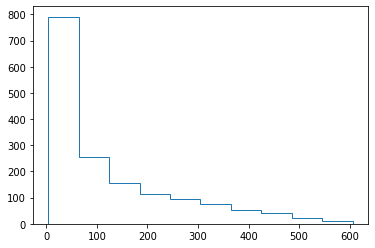

In [567]:
plt.hist(login_count, histtype='step')

In [568]:
login_count_no_adoption = engagement_no_adoption.groupby('user_id').agg(count = pd.NamedAgg(column='user_id', aggfunc='count')).sort_values(by='count',ascending=False)

(array([6.575e+03, 2.410e+02, 2.540e+02, 6.000e+01, 5.300e+01, 1.100e+01,
        1.100e+01, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 [<matplotlib.patches.Polygon at 0x7fedbb8b7110>])

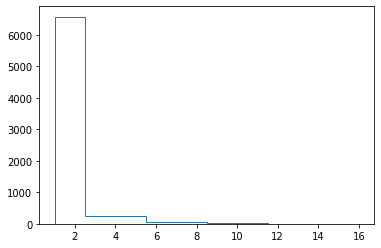

In [571]:
plt.hist(login_count_no_adoption, histtype='step')


With an imbalanced dataset we can't tell if the variables we have in the user dataset is a meaningful predictor for adoption. We can try down sampling the majority class to balance the data but looking at the engagement dataset and the counts of logins, it appears that there maybe a certain frequency between logins that can help us predict adoption in the future. This is worth exploring later.